# Assignment 3

In [3]:
import otter
grader = otter.Notebook()
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Assignment instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.

### Submission instructions

* Rename your notebook as **YourRollNumber_Part2.ipynb**. (e.g. *`2XXXXXXX_Part2.ipynb`*)
* Download your notebook as a PDF and rename it to **YourRollNumber_Part2.pdf**
* Only submit your notebook and PDF in a zip file named **YourRollNumber_DA3.zip** on LMS

## Dataset
Education is a critical determinant of future success, and one of the key factors that influence academic performance is class attendance. In this dataset, we aim to explore how different factors, such as attendance, extracurricular involvement, and study habits, may impact students' grades.

It is often suggested that attending classes above a certain threshold can have a positive effect on academic performance. However, a thorough analysis is required to confirm this hypothesis. In this assignment, we will use a dataset that includes several attributes of students, such as gender, high school type, weekly study hours, and attendance records, to investigate the factors contributing to student success.

For simplicity, this dataset contains information about approximately 120 students, with various features related to their academic and personal backgrounds. Each row represents a student and their academic history.

In [4]:
df = pd.read_csv("student_performance_data.csv")

## Data summary

Each row in this dataset represents a student with specific academic and personal history. We are interested in examining whether attending classes above the required percentage had any effect on whether or not they received good grades. Several attributes of the students are stored in this dataset:

- **student_id**: The student's unique ID for the study.
- **gender**:  The gender of the student, either 'Male' or 'Female'.
- **student_age**: The student's age at the time of the study.
- **high_school_type**: The type of high school the student attended, categorized as 'Other', 'State', or 'Private'.
- **scholarship**:  The percentage of scholarship received by the student, ranging from '25%', '50%', '75%', '100%', or 'No' scholarship.
- **sleep_quality**: The student's reported quality of sleep, categorized as 'Good' or 'Poor'.
- **involvement_in_extracurriculars**: Whether the student is involved in extracurricular activities, with values 'Yes' or 'No'.
- **weekly_study_hours**: The average number of hours the student studies per week.
- **attendance**: Whether the student’s attendance is above or below the required threshold, categorized as 'Above' or 'Below'.
- **assignments_completed**: Whether the student completed all course assignments, categorized as 'Yes' or 'No'.
- **attended_tutorials**: Whether the student attended tutorials, categorized as 'Yes' or 'No'.
- **grade**: The student's final grade

## Data cleaning

**Question 1**: A student's `id` is unimportant to us. Drop this column.

In [5]:
df = df.drop(columns=['student_id'])

In [6]:
grader.check("q1")

results: All test cases passed!

**Question 2**: We are working with numerical data, so you are required to convert age ranges to midpoint values. To help with this, write a Python function `convert_age_to_midpoint` that takes an `age_range` as input.

- If the `age_range` is a range (e.g., `'20-25'`), the function should return the midpoint of the range.
- If the `age_range` is a single value (e.g., `'30'`), the function should return that value as an integer.

Next, apply this function to the `student_age` column in a pandas DataFrame to convert all values into midpoints.


In [7]:
def convert_age_to_midpoint(age_range):
    if '-' in age_range:
        lower, upper = map(float, age_range.split('-'))
        return (lower + upper) / 2
    else:
        return float(age_range)


df['student_age'] = df['student_age'].apply(convert_age_to_midpoint)

In [8]:
grader.check("q2")

results: All test cases passed!

### Question 3:

**Question 3**: Similarly, convert the data entries to numerical data as decribed below. 

- **gender**: 1 if 'Male' and 0 if 'Female'
- **high_school_type**: 0 if 'Other', 1 if 'State', and 2 if 'Private'
- **scholarship**: 0.25 for '25%', 0.5 for '50%', 0.75 for '75%', 1 for '100%', and 0 if 'No'
- **sleep_quality**: 1 if 'Good', and 0 if 'Poor'
- **involvement_in_extracurriculars**: 1 if 'Yes', and 0 if 'No'
- **attendance**: 1 if 'Above', and 0 if 'Below'
- **assignments_completed**: 1 if 'Yes', and 0 if 'No'
- **attended_tutorials**: 1 if 'Yes', and 0 if 'No'
- **grade**: Convert letter grades into numeric values as follows:
    - 'A+' = 4.0
    - 'A' = 3.7
    - 'B+' = 3.3
    - 'B' = 3.0
    - 'C+' = 2.3
    - 'C' = 2.0
    - 'D' = 1.0
    - 'F' = 0.0

In [9]:
gender_map = {'Male': 1, 'Female': 0}
high_school_map = {'Other': 0, 'State': 1, 'Private': 2}
scholarship_map = {'25%': 0.25, '50%': 0.5, '75%': 0.75, '100%': 1.0, 'No': 0}
sleep_quality_map = {'Good': 1, 'Poor': 0}
involvement_map = {'Yes': 1, 'No': 0}
attendance_map = {'Above': 1, 'Below': 0}
assignments_map = {'Yes': 1, 'No': 0}
tutorials_map = {'Yes': 1, 'No': 0}
grade_map = {
    'A+': 4.0, 'A': 3.7, 'B+': 3.3, 'B': 3.0,
    'C+': 2.3, 'C': 2.0, 'D': 1.0, 'F': 0.0
}

df['gender'] = df['gender'].map(gender_map)
df['high_school_type'] = df['high_school_type'].map(high_school_map)
df['scholarship'] = df['scholarship'].map(scholarship_map)
df['sleep_quality'] = df['sleep_quality'].map(sleep_quality_map)
df['involvement_in_extracurriculars'] = df['involvement_in_extracurriculars'].map(involvement_map)
df['attendance'] = df['attendance'].map(attendance_map)
df['assignments_completed'] = df['assignments_completed'].map(assignments_map)
df['attended_tutorials'] = df['attended_tutorials'].map(tutorials_map)
df['grade'] = df['grade'].map(grade_map)

In [10]:
grader.check("q3")

results: All test cases passed!

## Exploratory Data Analysis

We are interested in examining how different groups of students are impacted by attending classes above the required threshold. The `attendance` variable is 1 if the student’s attendance is above the threshold (i.e., 'Above').

**Question 5:** 

a) Complete the function given below. Given a column name and dataframe, `treatment_plot` should plot the estimated average treatment effect for **all** groups of that column variable. 

b) What do you observe in your treatment plot for the column `gender`? Write your answer as a comment.

In [11]:
def treatment_plot(data, col, x_labels=None):
    treatment_means = data[data['attendance'] == 1].groupby(col)['grade'].mean()
    control_means = data[data['attendance'] == 0].groupby(col)['grade'].mean()

    treatment_effects = treatment_means - control_means

    x_labels = x_labels if x_labels is not None else treatment_effects.index.tolist()
    
    plt.figure(figsize=(8, 5))
    plt.bar(x_labels, treatment_effects, color='skyblue', edgecolor='black')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='No Effect')
    plt.title(f"Estimated Average Treatment Effect by {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Estimated ATE (Grade Difference)")
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

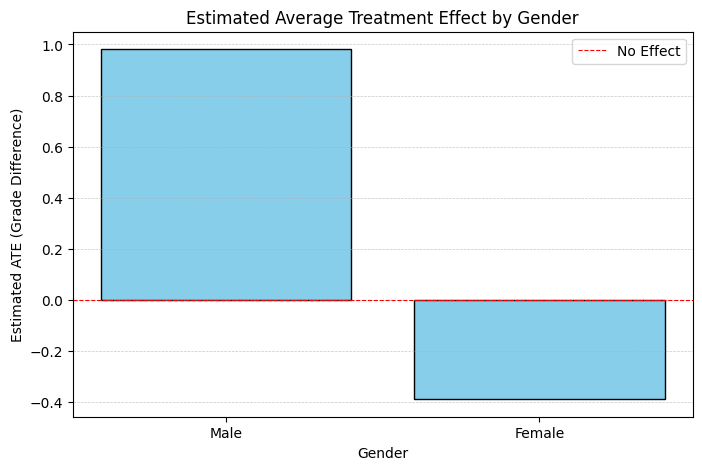

In [ ]:
treatment_plot(data=df, col='gender', x_labels=['Male', 'Female'])
# The Average ATE for men is positive and significantly higher in magnitude then that of women, meaning that men will show a stronger
# positive effect of the treatment, women will show a weaker, negative effect to the same treatment.

**Question 6:** 

a) Plot a correlation heatmap for this dataset (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any notable correlations. For any of these pairs, answer the following questions: Are they causally related? If so, is their causal relationship direct or indirect? Name any confounding variables you suspect. If you do not think they are causally related, comment why.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

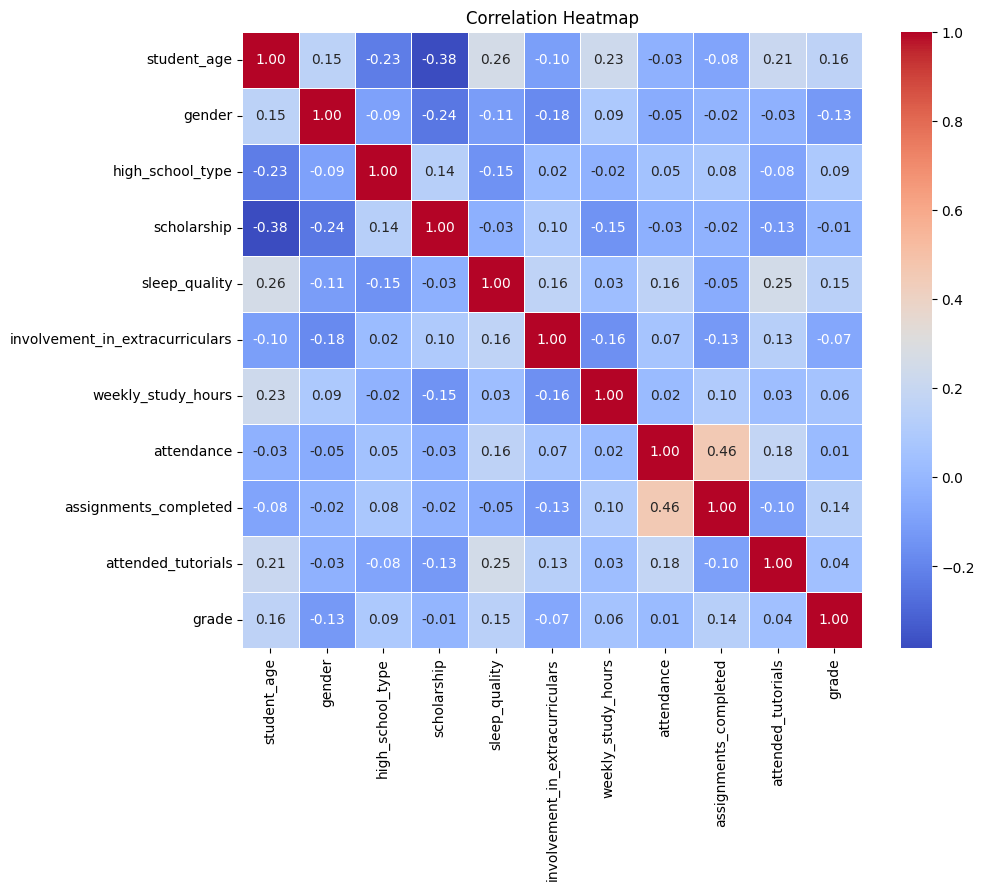

In [14]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Student age & (Sleep Quality, Weekly Study Hours, Attended Tuitorials):
    We can notice a moderate positive correlation between these pairs, which means an increase in these variables with student age. However we can't say that they are causally related, since there may be many confounding factors in play like emotions, responsibility, attitude of the student.

### Gender & Scholarships:
    We can see a moderate negative correlation between this pair, which means that opposit genders show different trends in scholarships. However, we can't deduce a causal relationship due to confounders such as an imbalance of data, or different schooling opportunities based on gender.

### Sleep Quality & Attended Tuitorials:
    We can see a moderate positive correlation between these two factors. We can deduce a indirect causal relationship, since a lower sleep quality doesn't verbatum mean not attendinf tuitorials. There may posibly exist possible common underlying factors.

### Attendance & Assignments Completed:
    We can see a relatively strong positive correlation between the two factors. We can deduce an indirect causal relationship between the two, since they both have a common underlying factor, one of the more obvious ones is knowledge. Attending classes increases knowledge, which in turn increases the number of Assignments completed.

## The Effect of Attendance Above the Required Threshold(Treatment)

**Question 7:** 

a) Find the overall estimated average treatment effect (under certain assumptions) of attending classes. Store it in the variable `estimated_ATE`.
Note: Your test case may pass even if your value has the wrong sign.

b) Is your result positive or negative? What do the sign (+ve or -ve) and magnitude of your result tell you about the effect of attending classes? Write your answer as a comment.

In [12]:
treatment_mean = df[df['attendance'] == 1]['grade'].mean()
control_mean = df[df['attendance'] == 0]['grade'].mean()

estimated_ATE = treatment_mean - control_mean
print(estimated_ATE)

#A positive result indicates a positive correlation between attendance and grades, meaning that a higher attendance leads to a higher
#grade and the oppostie for a negative correlation. The magnitude indicates the strength of the correlation. The greater the magnitude,
# the greater effect attendance has on grades.

0.035034013605442116


In [13]:
grader.check("q7")

results: All test cases passed!

c) Does this value reflect the actual accurate treatment effect (effect of attending classes above the required threshold) in our population? If not, under what assumptions will this be an accurate representation of the actual ATE?

In [60]:
# This value of the ATE is just a rough representation and does not represent the actual ATE, due to possible biases and confounding 
# factors in the data. For an actual representation of the ATE, 3 main assumptions need to be made:
# 1.    Ignorability: All factors influencing both attendance and grades are measured, controlled and hence, ignored.
# 2.    Consistency: The observed outcomes for students under the actual treatment condition match the outcomes in the
# same condition in any setting.
# 3.    SUTVA: The effect of the treatment on one student doesn't influence any other student.

**Question 8**: Does this estimated average treatment effect make sense to you or are we missing something? Explore the data further and look at the distribution of different groups of students (i.e., students having different values for different attributes) across the treatment and control groups. Comment on how this distribution **may** impact your observed ATE.

In [ ]:
print(df.groupby('attendance')[['assignments_completed', 'attended_tutorials', 'sleep_quality']].mean())
print(df['attendance'].value_counts(normalize=True))

# From this, we can see that the treatment group is over represented in the three variables, thus leading to not only a strong bias, but
# also suggesting that these varaibles may be the cause of achieving higher grades, and not attendance itself. Along with this, it also
# introduces confounding factors We can also see that the attendance group is heavily unbalanced leading to a highly biased and innacurate
# ATE.

            assignments_completed  attended_tutorials  sleep_quality
attendance                                                          
0                        0.047619            0.333333       0.142857
1                        0.642857            0.571429       0.336735
attendance
1    0.823529
0    0.176471
Name: proportion, dtype: float64


**Question 9a**: Now write code to find the estimated treatment effect separately within the different groups you explored above. What do your observations tell you? Do you think Simpson's Paradox can be seen manifesting in these observations? If you do observe Simpson's paradox, adjust for these covariates and report the conditional average treatment effect.

In [ ]:
def subgroup_treatment_effect(data, group_col):
    groups = data[group_col].unique()
    effects = {}

    for group in groups:
        treated = data[(data['attendance'] == 1) & (data[group_col] == group)]['grade']
        control = data[(data['attendance'] == 0) & (data[group_col] == group)]['grade']

        effects[group] = treated.mean() - control.mean()

    return effects

ate_assignments = subgroup_treatment_effect(df, 'assignments_completed')
print("ATE by Assignments Completed:")
print(ate_assignments)

ate_sleep = subgroup_treatment_effect(df, 'sleep_quality')
print("\nATE by Sleep Quality:")
print(ate_sleep)

ate_gender = subgroup_treatment_effect(df, 'gender')
print("\nATE by Gender:")
print(ate_gender)

ate_school = subgroup_treatment_effect(df, 'high_school_type')
print("\nATE by School Type:")
print(ate_school)

ate_scholarship = subgroup_treatment_effect(df, 'scholarship')
print("\nATE by Scholarship:")
print(ate_scholarship)

ate_extracurriculars = subgroup_treatment_effect(df, 'involvement_in_extracurriculars')
print("\nATE by Extracurriculars:")
print(ate_extracurriculars)

ate_weekly = subgroup_treatment_effect(df, 'weekly_study_hours')
print("\nATE by Study Hours:")
print(ate_weekly)

#From the results Simpson's paradox can be seen manifesting in Sleep Quality, Gender and Study Hours.

ATE by Assignments Completed:
{1: -0.6523809523809523, 0: -0.14428571428571413}

ATE by Sleep Quality:
{1: -0.6939393939393943, 0: 0.09495726495726453}

ATE by Gender:
{1: -0.3880208333333335, 0: 0.9813725490196079}

ATE by School Type:
{0: -0.0538461538461541, 1: 0.00523809523809593, 2: -0.38666666666666716}

ATE by Scholarship:
{0.5: 0.08153846153846134, 0.75: -0.1384615384615384, 1.0: -0.5470588235294116, 0.25: nan, nan: nan}

ATE by Extracurriculars:
{0: 0.03215053763440867, 1: 0.08888888888888946}

ATE by Study Hours:
{0: 0.03303030303030274, 2: -0.8375000000000004, 12: 0.7974358974358968, 8: nan}


In [34]:
def conditional_ATE(df, covariates):
    X = df[covariates].values
    X = np.column_stack([np.ones(X.shape[0]), X])
    
    treatment = df['attendance'].values
    
    y = df['grade'].values
    
    XtX_inv = np.linalg.inv(np.dot(X.T, X))
    XtY = np.dot(X.T, y)
    beta = np.dot(XtX_inv, XtY)
    
    treatment_effect = beta[1]
    
    return treatment_effect

covariates = ['sleep_quality', 'gender', 'weekly_study_hours']
cate = conditional_ATE(df, covariates)
print("Conditional Average Treatment Effect (CATE):", cate)

Conditional Average Treatment Effect (CATE): 0.31368069209075244


**Question 9b**: Now we want to explore the effect of conditioning on certain attributes on the overall estimated ATE. Condition on at least 3 attributes from the dataset *one by one* to report how the estimated ATE changes (this will require trial and error). For example, in the first step, condition on attribute *x*. In the next step, condition on some *x* and *y* together, and so on.

Report on your observations. How does the ATE change with every step? What does this tell you about the effect of these attributes on the probability of getting good grades among students who attend classes above the required percentage and those who attend classes below the required percentage.

Hint: refer to lecture slides to see how you can adjust for covariates to find a conditional ATE.

In [35]:
def conditional_ATE(df, covariates):
    X = df[covariates].values
    X = np.column_stack([np.ones(X.shape[0]), X])
    
    treatment = df['attendance'].values
    y = df['grade'].values
    
    XtX_inv = np.linalg.inv(np.dot(X.T, X))
    XtY = np.dot(X.T, y)
    beta = np.dot(XtX_inv, XtY)
    treatment_effect = beta[1]
    
    return treatment_effect

ate_step_1 = conditional_ATE(df, covariates=['sleep_quality'])
ate_step_2 = conditional_ATE(df, covariates=['sleep_quality', 'gender'])
ate_step_3 = conditional_ATE(df, covariates=['sleep_quality', 'gender', 'weekly_study_hours'])

print(f"ATE after conditioning on sleep_quality: {ate_step_1}")
print(f"ATE after conditioning on sleep_quality and gender: {ate_step_2}")
print(f"ATE after conditioning on sleep_quality, gender, and study_hours: {ate_step_3}")

ATE after conditioning on sleep_quality: 0.35063587684069386
ATE after conditioning on sleep_quality and gender: 0.32020550130831715
ATE after conditioning on sleep_quality, gender, and study_hours: 0.31368069209075244


**Question 10:** 

a) Calculate the p-value for the treatment and store it in `p_value`.

b) Comment on the statistical significance of your result. What does this p-value say about attending classes and grades? Clearly state your null and alternative hypotheses and the significance level you have chosen for your p-value. Should you reject the null hypothesis?

Note: You are allowed to use scipy for calculating the p-value.

In [ ]:
import scipy.stats as stats

grades_attendance_1 = df[df['attendance'] == 1]['grade']
grades_attendance_0 = df[df['attendance'] == 0]['grade']
t_stat, p_value = stats.ttest_ind(grades_attendance_1, grades_attendance_0, equal_var=True)
p_value


0.8962872881719963

In [ ]:
# Taking that out Null Hypothesis is that the treatment (attendance) has no impact on grades, then the Alternative Hypothesis would be
# that the treatment (attendance) has an impact on grades.
# Given that our P-value is very high, much higher than our standart significance level of 0.05, we cannot reject our Null Hypothesis
# and thus come to the conclusion that attendance shows no statistical impact on grades, and any correlation is likely coincidental.

In [16]:
grader.check("q10")

results: All test cases passed!

In [47]:
grader.check_all()

 results: All test cases passed!